# Case Study of BankNifty and Nifty50

In [1]:
#importing the necessary libraries
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the datasets
BankNifty = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/DATA SCIENCE COURSE (Datasets)/Bank Nifty(clean).csv')
Nifty50 = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/DATA SCIENCE COURSE (Datasets)/Nifty 50(clean).csv')

In [3]:
BankNifty

,index,date,time,open,high,low,close
0,BANKNIFTY,03/12/2012,9:16,12125.70,12161.70,12125.70,12160.95
1,BANKNIFTY,03/12/2012,9:17,12161.75,12164.80,12130.40,12130.40
2,BANKNIFTY,03/12/2012,9:18,12126.85,12156.10,12126.85,12156.10
3,BANKNIFTY,03/12/2012,9:19,12157.25,12164.75,12151.60,12164.20
4,BANKNIFTY,03/12/2012,9:20,12162.80,12162.80,12148.20,12151.15
...,...,...,...,...,...,...,...
367570,BANKNIFTY,30/09/2016,15:26,19321.00,19322.80,19314.25,19318.35
367571,BANKNIFTY,30/09/2016,15:27,19318.80,19322.20,19312.30,19317.40
367572,BANKNIFTY,30/09/2016,15:28,19317.55,19323.40,19314.45,19315.95
367573,BANKNIFTY,30/09/2016,15:29,19315.80,19324.20,19312.00,19314.10


In [4]:
Nifty50

,index,date,time,open,high,low,close
0,NIFTY,01/04/2013,9:16,5701.15,5704.65,5694.30,5697.00
1,NIFTY,01/04/2013,9:17,5697.05,5698.35,5695.65,5697.50
2,NIFTY,01/04/2013,9:18,5697.90,5697.90,5690.60,5692.15
3,NIFTY,01/04/2013,9:19,5691.65,5694.70,5691.65,5693.90
4,NIFTY,01/04/2013,9:20,5694.40,5695.05,5693.35,5694.55
...,...,...,...,...,...,...,...
352915,NIFTY,30/09/2016,15:26,8618.00,8619.85,8617.65,8618.50
352916,NIFTY,30/09/2016,15:27,8618.45,8618.95,8617.25,8617.25
352917,NIFTY,30/09/2016,15:28,8617.20,8618.65,8616.85,8617.50
352918,NIFTY,30/09/2016,15:29,8617.40,8618.80,8615.60,8616.65


## Bank Nifty

### Data Preprocessing

In [5]:
BankNifty.shape

(367575, 7)

In [6]:
BankNifty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367575 entries, 0 to 367574
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   index   367575 non-null  object 
 1   date    367575 non-null  object 
 2   time    367575 non-null  object 
 3   open    367575 non-null  float64
 4   high    367575 non-null  float64
 5   low     367575 non-null  float64
 6   close   367575 non-null  float64
dtypes: float64(4), object(3)
memory usage: 19.6+ MB


In [7]:
BankNifty.isna().sum()

index    0
date     0
time     0
open     0
high     0
low      0
close    0
dtype: int64

#### It can be observed that there are no missing values. Datatype of date should be changed into pandas data time format

In [8]:
BankNifty['date'] = pd.to_datetime(BankNifty['date'])

### Splitting date column into year

In [9]:
BankNifty['year'] = pd.DatetimeIndex(BankNifty['date']).year

In [10]:
BankNifty

,index,date,time,open,high,low,close,year
0,BANKNIFTY,2012-03-12,9:16,12125.70,12161.70,12125.70,12160.95,2012
1,BANKNIFTY,2012-03-12,9:17,12161.75,12164.80,12130.40,12130.40,2012
2,BANKNIFTY,2012-03-12,9:18,12126.85,12156.10,12126.85,12156.10,2012
3,BANKNIFTY,2012-03-12,9:19,12157.25,12164.75,12151.60,12164.20,2012
4,BANKNIFTY,2012-03-12,9:20,12162.80,12162.80,12148.20,12151.15,2012
...,...,...,...,...,...,...,...,...
367570,BANKNIFTY,2016-09-30,15:26,19321.00,19322.80,19314.25,19318.35,2016
367571,BANKNIFTY,2016-09-30,15:27,19318.80,19322.20,19312.30,19317.40,2016
367572,BANKNIFTY,2016-09-30,15:28,19317.55,19323.40,19314.45,19315.95,2016
367573,BANKNIFTY,2016-09-30,15:29,19315.80,19324.20,19312.00,19314.10,2016


In [11]:
#counting values for each year
BankNifty['year'].value_counts()

2013    93001
2015    92565
2014    90885
2016    76499
2012    14625
Name: year, dtype: int64

In [12]:
BankNifty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367575 entries, 0 to 367574
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   index   367575 non-null  object        
 1   date    367575 non-null  datetime64[ns]
 2   time    367575 non-null  object        
 3   open    367575 non-null  float64       
 4   high    367575 non-null  float64       
 5   low     367575 non-null  float64       
 6   close   367575 non-null  float64       
 7   year    367575 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 22.4+ MB


#### Now the dataframe's format seems correct

## Exploratory Data Analysis

In [13]:
BankNifty.describe()

,open,high,low,close,year
count,367575.000000,367575.000000,367575.000000,367575.000000,367575.000000
mean,15078.023296,15082.498465,15073.480983,15077.993028,2014.335474
std,3184.438089,3185.213591,3183.628315,3184.411825,1.176402
min,1405.050000,1407.050000,1404.600000,1405.200000,2012.000000
25%,12092.200000,12095.000000,12089.150000,12092.175000,2013.000000
50%,15526.100000,15531.200000,15521.400000,15525.950000,2014.000000
75%,17956.050000,17960.550000,17951.100000,17955.800000,2015.000000
max,20903.950000,20907.550000,20899.250000,20907.550000,2016.000000


<AxesSubplot:xlabel='close'>

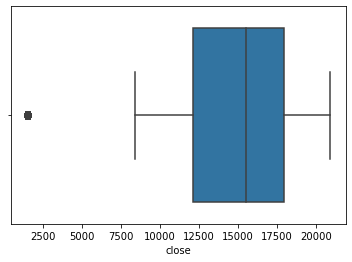

In [14]:
#using boxplot for checking the outliers
sns.boxplot(x = BankNifty['close'])

#### Closing price ranges from 7500 to 20000. There are some outliers at 2500. 

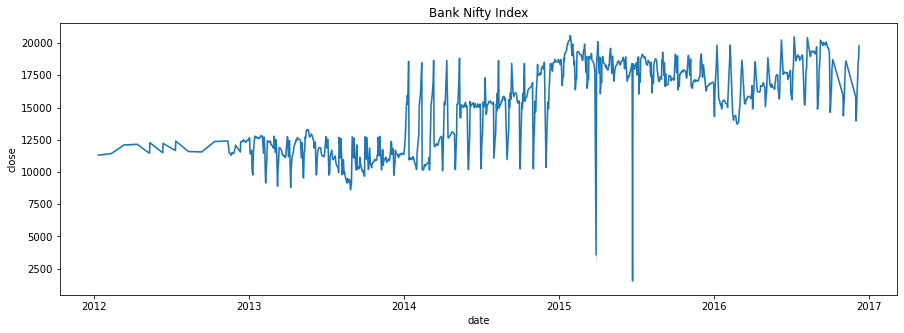

In [15]:
plt.figure(figsize=(15,5))
plt.title("Bank Nifty Index")
sns.lineplot(data = BankNifty, x = "date" , y = "close")
plt.show()

#### Observations :- 
- . Bank Nifty has its lowest value in mid of 2015.
- . Bank Nifty has its highest value in mid of 2016.
- . There is a dip in the value of Bank Nifty in 2015.
- . Rise in values can be seen in range 2014 - 2015 and 2016 - 2017.

## Analyzing Bank Nifty Index yearwise

### BankNifty - 2012

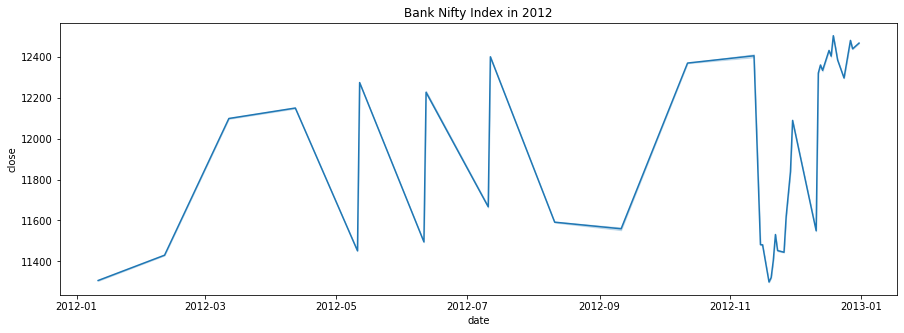

In [16]:
plt.figure(figsize = (15,5))
plt.title("Bank Nifty Index in 2012")
sns.lineplot(data = BankNifty.loc[BankNifty.year == 2012], x = "date", y = "close")
plt.show()

#### Observations :-
- . Bank Nifty has its lowest value around 11200 in january 2012 and november 2012.
- . Bank Nifty has its highest value around 12500 in december 2012.
- . Bank Nifty index value showed rise in value from feburary 2012 to august 2012.
- . There is a dip in the values in september 2012.

In [17]:
#for comparing the average closing price in 2012
BankNifty.loc[BankNifty.year == 2012].describe()

,open,high,low,close,year
count,14625.000000,14625.000000,14625.000000,14625.000000,14625.0
mean,11954.934250,11957.512646,11952.455805,11955.002085,2012.0
std,444.550633,444.702210,444.416735,444.536737,0.0
min,11239.600000,11246.600000,11230.200000,11237.700000,2012.0
25%,11491.050000,11492.950000,11489.050000,11491.000000,2012.0
50%,12109.150000,12111.750000,12106.550000,12109.400000,2012.0
75%,12389.050000,12392.700000,12386.700000,12389.300000,2012.0
max,12569.250000,12571.600000,12559.600000,12569.200000,2012.0


#### Average closing price in 2012 is nearly 12000

### BankNifty - 2013

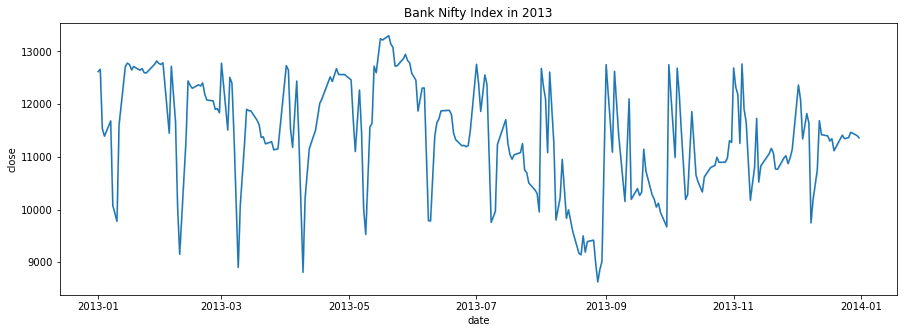

In [18]:
plt.figure(figsize = (15,5))
plt.title("Bank Nifty Index in 2013")
sns.lineplot(data = BankNifty.loc[BankNifty.year == 2013], x = "date", y = "close")
plt.show()

#### Observations :-
- . Bank Nifty has its lowest value around 8300 in september 2013.
- . Bank Nifty has its highest value around 13500 in june 2013.
- . Bank Nifty index value shows fluctuation in alternative months.
- . Four tips can be observed near the lowest value around 9000.

In [19]:
#for comparing the average closing price in 2013
BankNifty.loc[BankNifty.year == 2013].describe()

,open,high,low,close,year
count,93001.000000,93001.000000,93001.000000,93001.000000,93001.0
mean,11415.430998,11418.910385,11411.886463,11415.403434,2013.0
std,1049.433522,1048.913390,1049.941954,1049.420085,0.0
min,8384.300000,8401.450000,8366.750000,8383.300000,2013.0
25%,10802.000000,10805.900000,10798.350000,10802.200000,2013.0
50%,11417.800000,11420.650000,11414.600000,11417.950000,2013.0
75%,12356.550000,12359.450000,12353.800000,12356.700000,2013.0
max,13410.000000,13414.300000,13407.550000,13408.450000,2013.0


#### Average closing price in 2013 is nearly 11500

### BankNifty - 2014

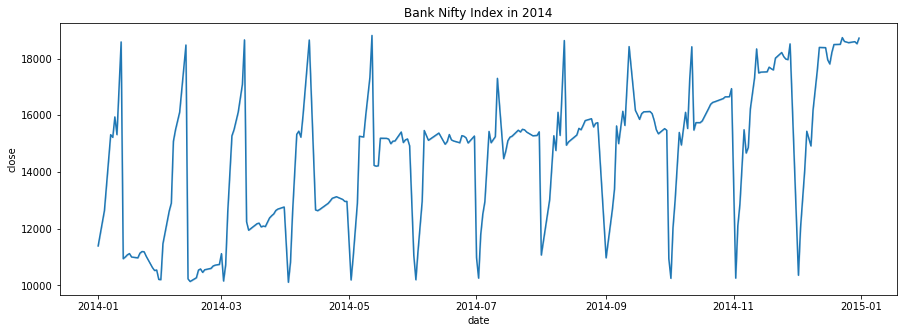

In [20]:
plt.figure(figsize = (15,5))
plt.title("Bank Nifty Index in 2014")
sns.lineplot(data = BankNifty.loc[BankNifty.year == 2014], x = "date", y = "close")
plt.show()

#### Observations :-
- . Bank Nifty has its lowest value around 10000 in april,may,june,october,november and december 2014.
- . Bank Nifty has its highest value around 19000 in april 2014.
- . Bank Nifty index value shows a drop after it reaches 19000.
- . Bank Nifty index value shows a rise after it reaches 10000.

In [21]:
#for comparing the average closing price in 2014
BankNifty.loc[BankNifty.year == 2014].describe()

,open,high,low,close,year
count,90885.000000,90885.00000,90885.000000,90885.000000,90885.0
mean,14523.741866,14527.77900,14519.675620,14523.732707,2014.0
std,2479.217283,2479.71396,2478.715461,2479.194415,0.0
min,9948.300000,9952.45000,9944.000000,9945.650000,2014.0
25%,12542.150000,12545.55000,12537.900000,12542.050000,2014.0
50%,15200.150000,15205.00000,15194.900000,15199.950000,2014.0
75%,16028.600000,16032.05000,16023.850000,16028.400000,2014.0
max,18922.250000,18923.60000,18913.400000,18919.600000,2014.0


#### Average closing price in 2014 is nearly 15000

### BankNifty - 2015

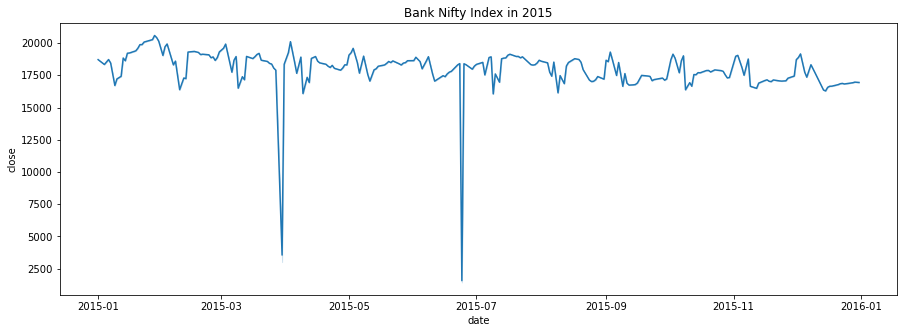

In [22]:
plt.figure(figsize = (15,5))
plt.title("Bank Nifty Index in 2015")
sns.lineplot(data = BankNifty.loc[BankNifty.year == 2015], x = "date", y = "close")
plt.show()

#### Observations :-
- . Bank Nifty has its lowest value around 1400 in july 2015.
- . Bank Nifty value shows a fluctuation in price in range 20000 to 17000.
- . Bank Nifty index value shows a drop in april 2015 and july 2015.

In [23]:
#for comparing the average closing price in 2015
BankNifty.loc[BankNifty.year == 2015].describe()

,open,high,low,close,year
count,92565.000000,92565.000000,92565.000000,92565.000000,92565.0
mean,17991.149992,17996.602353,17985.507456,17991.075921,2015.0
std,1685.364716,1685.675950,1685.004915,1685.325666,0.0
min,1405.050000,1407.050000,1404.600000,1405.200000,2015.0
25%,17316.300000,17322.350000,17310.000000,17316.150000,2015.0
50%,18269.550000,18274.400000,18264.750000,18269.350000,2015.0
75%,18800.100000,18805.350000,18794.600000,18799.450000,2015.0
max,20903.950000,20907.550000,20899.250000,20907.550000,2015.0


#### Average closing price in 2015 is nearly 18000

### BankNifty - 2016

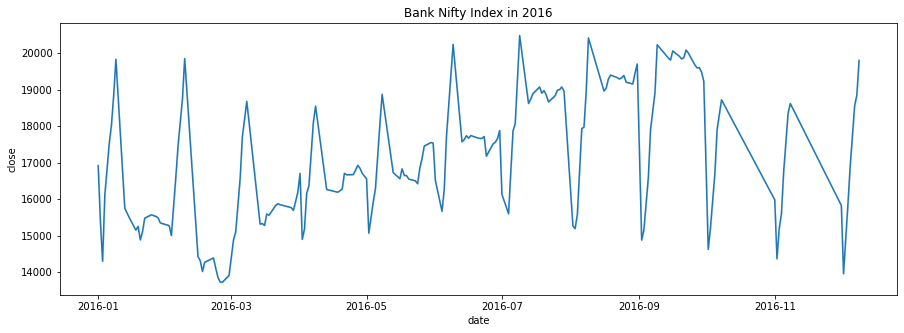

In [24]:
plt.figure(figsize = (15,5))
plt.title("Bank Nifty Index in 2016")
sns.lineplot(data = BankNifty.loc[BankNifty.year == 2016], x = "date", y = "close")
plt.show()

#### Observations :-
- . Bank Nifty has its lowest value around 13000 in march 2016.
- . Bank Nifty has its highest value around 20500 in july 2016.
- . Bank Nifty index value shows a drop after it reaches 19500.
- . Bank Nifty index value shows a rise after it reaches 15000.

In [25]:
#for comparing the average closing price in 2016
BankNifty.loc[BankNifty.year == 2016].describe()

,open,high,low,close,year
count,76499.000000,76499.000000,76499.000000,76499.000000,76499.0
mean,17261.348814,17266.735185,17255.964613,17261.324427,2016.0
std,1742.394857,1741.895060,1742.904406,1742.388843,0.0
min,13441.550000,13471.450000,13407.250000,13442.800000,2016.0
25%,15756.750000,15764.900000,15750.650000,15757.575000,2016.0
50%,17509.350000,17514.500000,17504.950000,17509.350000,2016.0
75%,18865.550000,18870.700000,18859.700000,18865.450000,2016.0
max,20568.800000,20575.800000,20562.850000,20569.050000,2016.0


#### Average closing price in 2016 is nearly 17500

### Observations :- Average closing price shows a sharp rise after 2013 .

## Nifty50

### Data Preprocessing

In [26]:
Nifty50.shape

(352920, 7)

In [27]:
Nifty50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352920 entries, 0 to 352919
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   index   352920 non-null  object 
 1   date    352920 non-null  object 
 2   time    352920 non-null  object 
 3   open    352920 non-null  float64
 4   high    352920 non-null  float64
 5   low     352920 non-null  float64
 6   close   352920 non-null  float64
dtypes: float64(4), object(3)
memory usage: 18.8+ MB


In [28]:
Nifty50.isna().sum()

index    0
date     0
time     0
open     0
high     0
low      0
close    0
dtype: int64

#### It can be observed that there are no missing values. Datatype of date should be changed into pandas data time format

In [29]:
Nifty50['date'] = pd.to_datetime(Nifty50['date'])

### Splitting date column into year

In [30]:
Nifty50['year'] = pd.DatetimeIndex(Nifty50['date']).year

In [31]:
Nifty50

,index,date,time,open,high,low,close,year
0,NIFTY,2013-01-04,9:16,5701.15,5704.65,5694.30,5697.00,2013
1,NIFTY,2013-01-04,9:17,5697.05,5698.35,5695.65,5697.50,2013
2,NIFTY,2013-01-04,9:18,5697.90,5697.90,5690.60,5692.15,2013
3,NIFTY,2013-01-04,9:19,5691.65,5694.70,5691.65,5693.90,2013
4,NIFTY,2013-01-04,9:20,5694.40,5695.05,5693.35,5694.55,2013
...,...,...,...,...,...,...,...,...
352915,NIFTY,2016-09-30,15:26,8618.00,8619.85,8617.65,8618.50,2016
352916,NIFTY,2016-09-30,15:27,8618.45,8618.95,8617.25,8617.25,2016
352917,NIFTY,2016-09-30,15:28,8617.20,8618.65,8616.85,8617.50,2016
352918,NIFTY,2016-09-30,15:29,8617.40,8618.80,8615.60,8616.65,2016


In [32]:
#counting values for each year
Nifty50['year'].value_counts()

2013    93003
2015    92624
2014    90885
2016    76408
Name: year, dtype: int64

In [33]:
Nifty50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352920 entries, 0 to 352919
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   index   352920 non-null  object        
 1   date    352920 non-null  datetime64[ns]
 2   time    352920 non-null  object        
 3   open    352920 non-null  float64       
 4   high    352920 non-null  float64       
 5   low     352920 non-null  float64       
 6   close   352920 non-null  float64       
 7   year    352920 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 21.5+ MB


#### Now the dataframe's format seems correct

In [34]:
Nifty50.describe()

,open,high,low,close,year
count,352920.000000,352920.000000,352920.000000,352920.000000,352920.000000
mean,7374.515649,7376.077510,7372.936147,7374.498883,2014.431931
std,1070.893139,1071.032665,1070.756739,1070.885970,1.097918
min,5126.150000,5127.250000,5118.850000,5126.300000,2013.000000
25%,6167.650000,6168.900000,6166.550000,6167.700000,2013.000000
50%,7738.800000,7740.150000,7737.450000,7738.800000,2014.000000
75%,8298.762500,8300.900000,8297.050000,8298.750000,2015.000000
max,9115.400000,9119.200000,9105.650000,9106.500000,2016.000000


## Exploratory Data Analysis

In [35]:
Nifty50.describe()

,open,high,low,close,year
count,352920.000000,352920.000000,352920.000000,352920.000000,352920.000000
mean,7374.515649,7376.077510,7372.936147,7374.498883,2014.431931
std,1070.893139,1071.032665,1070.756739,1070.885970,1.097918
min,5126.150000,5127.250000,5118.850000,5126.300000,2013.000000
25%,6167.650000,6168.900000,6166.550000,6167.700000,2013.000000
50%,7738.800000,7740.150000,7737.450000,7738.800000,2014.000000
75%,8298.762500,8300.900000,8297.050000,8298.750000,2015.000000
max,9115.400000,9119.200000,9105.650000,9106.500000,2016.000000


<AxesSubplot:xlabel='close'>

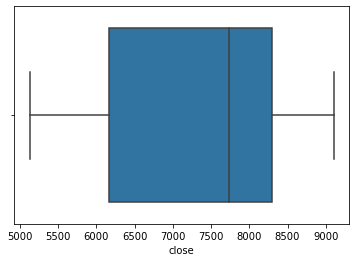

In [36]:
#using boxplot for checking the outliers
sns.boxplot(x = Nifty50['close'])

#### Closing price ranges from 5000 to 9000. There are no outliers. 

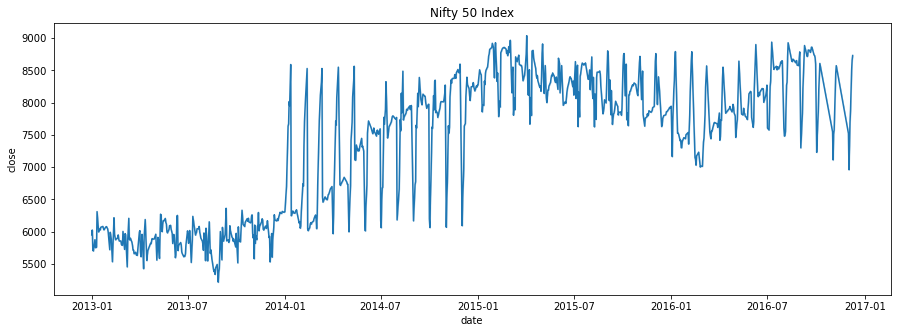

In [37]:
plt.figure(figsize = (15,5))
plt.title("Nifty 50 Index")
sns.lineplot(data = Nifty50, x = "date", y = "close")
plt.show()

#### Observations :-
- . Nifty 50 has its lowest value around 5000 in july 2013.
- . Nifty 50 has its highest value around 9000 in july 2016.
- . Bank Nifty index value shows a drop after it reaches 8600.
- . Bank Nifty index value shows a rise after it reaches 6200.

## Analyzing Nifty 50 Index yearwise

### Nifty50 - 2013

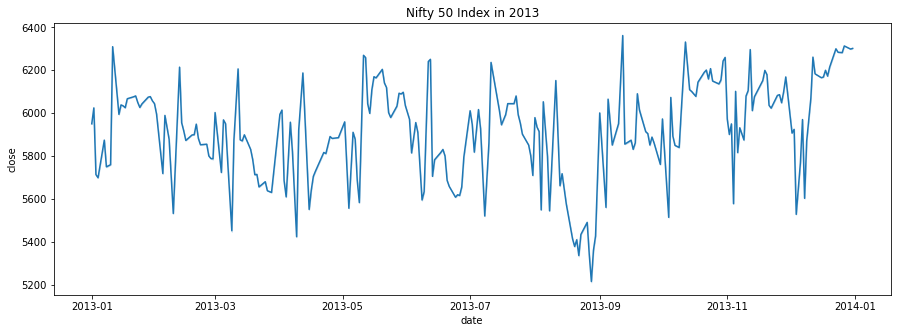

In [38]:
plt.figure(figsize = (15,5))
plt.title("Nifty 50 Index in 2013")
sns.lineplot(data = Nifty50.loc[Nifty50.year == 2013], x = "date", y = "close")
plt.show()

#### Observations :-
- . Nifty 50 has its lowest value around 5000 in september 2013.
- . Nifty 50 has its highest value around 6400 in october 2013.
- . Nifty 50 index value shows a drop after it reaches 6200.
- . Bank Nifty index value shows a rise after it reaches 5500.

In [39]:
#for comparing the average closing price in 2013
Nifty50.loc[Nifty50.year == 2013].describe()

,open,high,low,close,year
count,93003.000000,93003.000000,93003.000000,93003.000000,93003.0
mean,5915.264636,5916.622523,5913.879929,5915.254401,2013.0
std,226.645142,226.468612,226.853178,226.647282,0.0
min,5126.150000,5127.250000,5118.850000,5126.300000,2013.0
25%,5782.450000,5783.950000,5780.900000,5782.475000,2013.0
50%,5938.650000,5940.000000,5937.350000,5938.700000,2013.0
75%,6074.175000,6075.350000,6072.950000,6074.150000,2013.0
max,6415.250000,6415.250000,6396.950000,6397.750000,2013.0


#### Average closing price in 2013 is nearly 6000

### Nifty50 - 2014

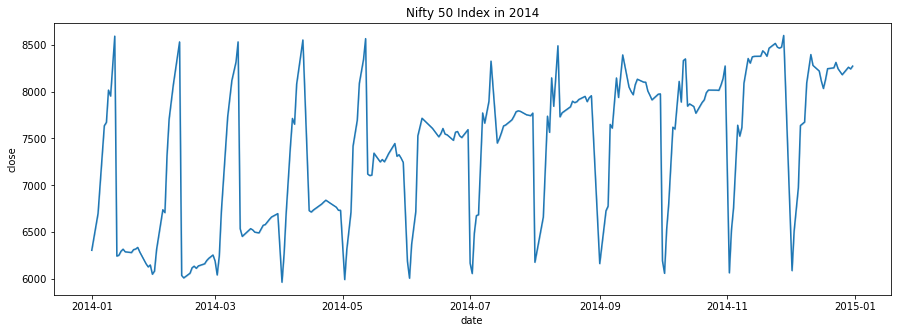

In [40]:
plt.figure(figsize = (15,5))
plt.title("Nifty 50 Index in 2014")
sns.lineplot(data = Nifty50.loc[Nifty50.year == 2014], x = "date", y = "close")
plt.show()

#### Observations :-
- . Nifty 50 has its lowest value around 6000 in april 2014.
- . Nifty 50 has its highest value around 8500 in january 2014.
- . Nifty 50 index value shows a drop after it reaches 8500.
- . Nifty 50 index value shows a rise after it reaches 6000.

In [41]:
#for comparing the average closing price in 2014
Nifty50.loc[Nifty50.year == 2014].describe()

,open,high,low,close,year
count,90885.000000,90885.000000,90885.000000,90885.000000,90885.0
mean,7360.523343,7361.996985,7359.057414,7360.517056,2014.0
std,785.715394,785.864121,785.569572,785.706131,0.0
min,5934.600000,5937.300000,5933.300000,5934.650000,2014.0
25%,6652.950000,6654.150000,6651.600000,6652.950000,2014.0
50%,7584.700000,7586.750000,7582.500000,7584.550000,2014.0
75%,8007.250000,8008.800000,8006.000000,8007.300000,2014.0
max,8618.350000,8626.950000,8614.400000,8618.950000,2014.0


#### Average closing price in 2014 is nearly 7500

### Nifty50 - 2015

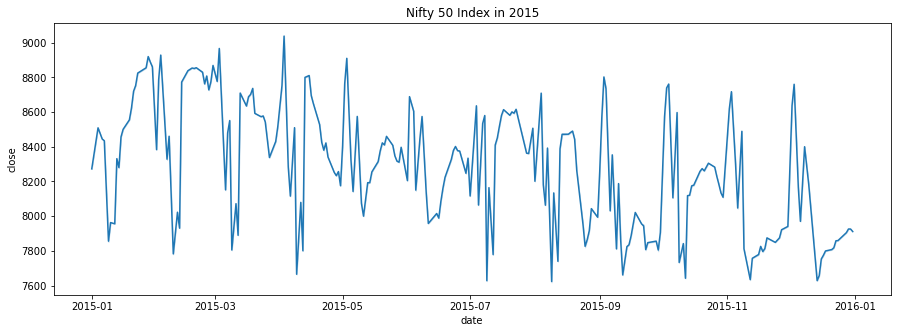

In [42]:
plt.figure(figsize = (15,5))
plt.title("Nifty 50 Index in 2015")
sns.lineplot(data = Nifty50.loc[Nifty50.year == 2015], x = "date", y = "close")
plt.show()

#### Observations :-
- . Nifty 50 has its lowest value around 7500 in july and august 2015.
- . Nifty 50 has its highest value around 9000 in april 2014.
- . Nifty 50 index value shows a drop after it reaches 8800.
- . Nifty 50 index value shows a rise after it reaches 7900.

In [43]:
#for comparing the average closing price in 2015
Nifty50.loc[Nifty50.year == 2015].describe()

,open,high,low,close,year
count,92624.000000,92624.000000,92624.000000,92624.000000,92624.0
mean,8290.843641,8292.695497,8288.949228,8290.816397,2015.0
std,346.173633,346.254172,346.096598,346.167560,0.0
min,7543.100000,7547.400000,7539.500000,7543.800000,2015.0
25%,7988.650000,7990.750000,7986.637500,7988.625000,2015.0
50%,8314.875000,8316.500000,8313.050000,8314.850000,2015.0
75%,8565.000000,8566.500000,8563.450000,8564.950000,2015.0
max,9115.400000,9119.200000,9105.650000,9106.500000,2015.0


#### Average closing price in 2015 is nearly 8500

### Nifty50 - 2016

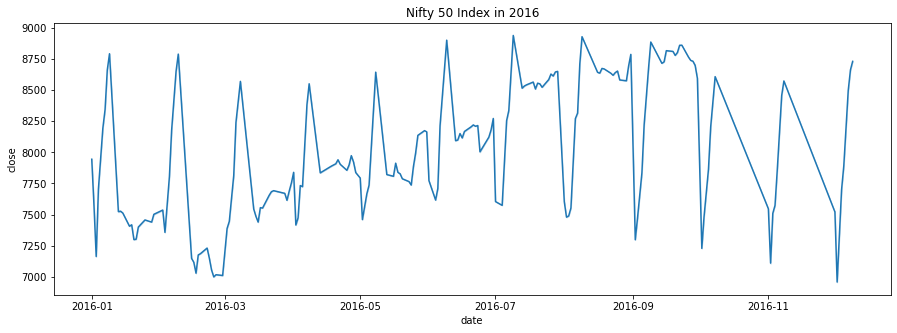

In [44]:
plt.figure(figsize = (15,5))
plt.title("Nifty 50 Index in 2016")
sns.lineplot(data = Nifty50.loc[Nifty50.year == 2016], x = "date", y = "close")
plt.show()

#### Observations :-
- . Nifty 50 has its lowest value around 6800 in march and december 2016.
- . Nifty 50 has its highest value around 9000 in july and august 2016.
- . Nifty 50 index value shows a drop after it reaches 8500.
- . Nifty 50 index value shows a rise after it reaches 7200.

In [45]:
#for comparing the average closing price in 2016
Nifty50.loc[Nifty50.year == 2016].describe()

,open,high,low,close,year
count,76408.000000,76408.000000,76408.000000,76408.00000,76408.0
mean,8056.544347,8058.107877,8054.974394,8056.51987,2016.0
std,528.897642,528.668718,529.138890,528.90488,0.0
min,6846.800000,6860.900000,6825.800000,6848.10000,2016.0
25%,7591.987500,7593.850000,7590.437500,7592.02500,2016.0
50%,8106.350000,8107.575000,8104.650000,8106.45000,2016.0
75%,8563.600000,8564.950000,8561.900000,8563.40000,2016.0
max,8964.050000,8966.100000,8962.050000,8964.25000,2016.0


#### Average closing price in 2015 is nearly 8000

### Observations :- Average closing price is nearly same for all the years.